# GridBasedDBSCAN

Grid-based DBSCAN is a modification of regular DBSCAN designed for automotive  
radars. It assumes close objects will appear wider, and distant objects will  
appear narrower, and varies the search area accordingly. See Kellner et al. 2012.  
It is not yet clear whether this assumption is advantageous for SuperDARN data.

My implementation of GBDBSCAN has not been optimized to the extent sklearn's  
DBSCAN has, so it takes 5-10 minutes, but there is room for improvement. So far,  
it provides similar performace to DBSCAN, but creates less small clusters at   
close ranges due to its wide search area.

Parameters for each algorithm are set to default values (shown below), but can  
be modified using the class constructor.

### Optional arguments for GridbasedDBSCAN_GMM class constructor

#### GridBasedDBSCAN
     f=0.2
        Used to calculate the width of the search area at a given range gate:
          beam_eps = g / (f * radial_dist / angular_dist)
        Best values for our data are typically f=0.1-0.4

     g=1
         See above formula.
         Best values for our data are typically g=1-3
         
     pts_ratio=0.3
         The ratio of (actual observations) / (possible observations) for points
         to be considered part of a core cluster.
         Since the search area changes size, this parameter is used instead of
         DBSCAN's MinPts. Possible observations is the number of points that
         could appear within the search area, so pts_ratio=0.3 means 30% of
         the search area needs to contain points in order to create a core
         cluster.
     
     dr=45
         The distance between each range gate (for SuperDARN radars, 45 km).
         Make sure units are consistent with r_init.
     
     dtheta=3.24
         The angular difference between each beam, in degrees.
     
     r_init=180
         The distance to the first range gate (for SuperDARN radars, 180km).
         Make sure units are consistent with dr.
     
     scan_eps=1
         Determines the scan number radius of the search area for GridBasedDBSCAN. 
         If this is 1, two points must come from adjacent scans (i.e., both from 
         beam 3 in 2 subsequent measurements) to be considered neighbors.

In [4]:
import sys
sys.path.insert(0,'..')
from algorithms.grid_based_dbscan import GridBasedDBSCAN
import datetime

start_time =  datetime.datetime(2017, 4, 4)
end_time =  datetime.datetime(2017, 4, 5)
gbdb = GridBasedDBSCAN(start_time, end_time, 'cvw', useSavedResult=False)
gbdb.save_result()
print(gbdb.runtime)

402.506719827652


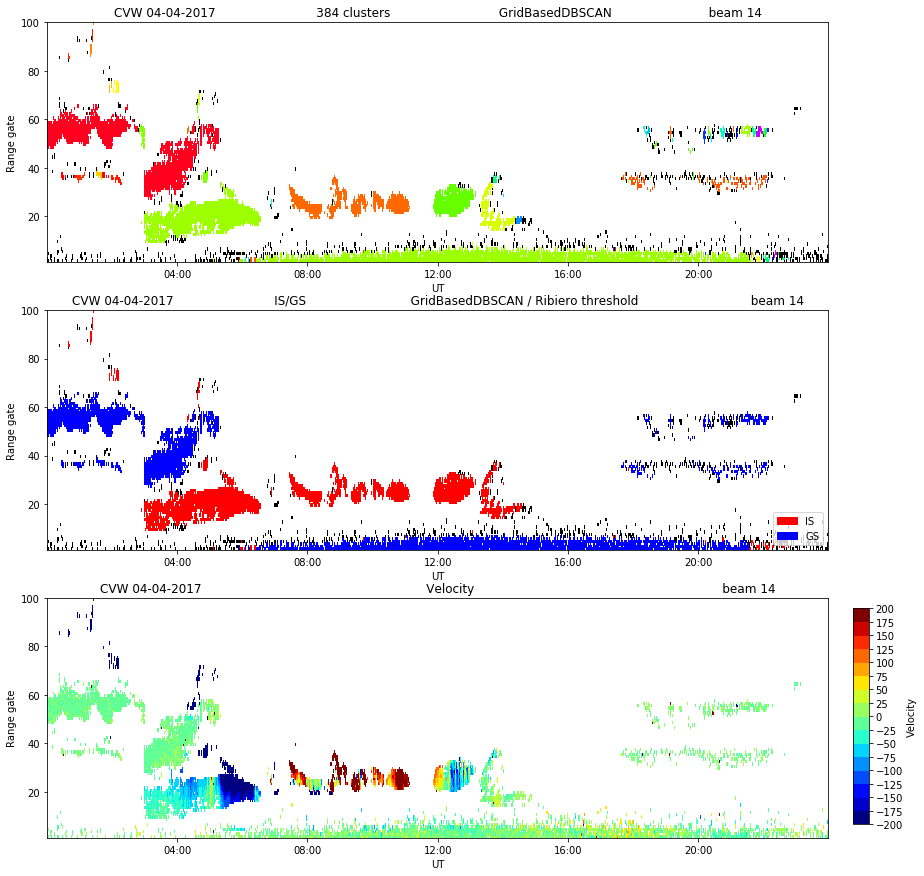

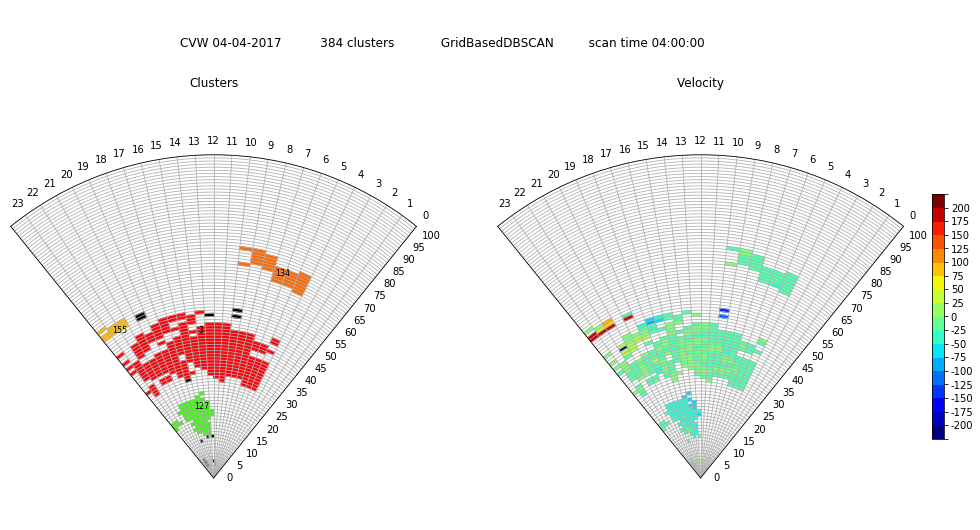

In [5]:
# Make RTI plots to compare AJ's threshold with traditional threshold
gbdb.plot_rti(14, 'Ribiero', save=True)
fanplot_start =  datetime.datetime(2017, 4, 4, 4, 0, 0)
fanplot_end =  datetime.datetime(2017, 4, 4, 4, 0, 0)
gbdb.plot_fanplots(fanplot_start, fanplot_end, save=True)